# Módulo 2️⃣ - Validação

## Importação e carregamento dos dados

In [ ]:
# Importação de bibliotecas
## Processamento de dados
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit

## Matplotlib e estilos para criação de gráficos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

In [ ]:
# Iremos trabalhar com dados de Pokémon (Extraídos da PokéAPI)
data = {
    'Nome': ['Charmander', 'Squirtle', 'Growlithe', 'Psyduck', 'Vulpix', 'Poliwag',
             'Magmar', 'Tentacool', 'Cyndaquil', 'Totodile', 'Torchic', 'Mudkip',
             'Chimchar', 'Piplup', 'Fennekin', 'Froakie'],
    'Tipo': ['Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água'],
    'Attack': [52, 48, 70, 52, 50, 50, 95, 40, 49, 65, 60, 70, 58, 51, 61, 56],
    'Speed': [65, 43, 60, 55, 65, 90, 93, 70, 65, 43, 45, 40, 61, 50, 72, 71]
}

In [ ]:
# Criando dataframe
df_pokemon = pd.DataFrame(data)
print(df_pokemon)

In [ ]:
# Transformando valores categóricos em números inteiros (isso permite a categorização dos dados pelo computador)
le = LabelEncoder()
df_pokemon['Tipo'] = le.fit_transform(df_pokemon['Tipo'])
print(df_pokemon)

In [ ]:
# Separando dados de treinamento e teste
x_pokemon = df_pokemon[['Attack', 'Speed']].values
y_pokemon = df_pokemon['Tipo'].values

df_pokemon.head()

In [ ]:
# Particionando dados de treinamento
x_train, x_test, y_train, y_test = train_test_split(x_pokemon, y_pokemon, test_size=0.3, random_state=30)

## Criação de função para exibir dados

In [ ]:
# Função para visualização
def plot_model(model, x_train, y_train, x_test, y_test, title):
    # --- Geração da grade para o plano de fundo do gráfico ---
    x_min, x_max = [x_pokemon[:, 0].min() - 5, x_pokemon[:, 0].max() + 5]
    y_min, y_max = [x_pokemon[:, 1].min() - 5, x_pokemon[:, 1].max() + 5]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

    # --- Previsão e formatação dos dados para o plano de fundo ---
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    print(f'Z: {z}')
    z = z.reshape(xx.shape)

    # --- Plotagem dos dados ---
    plt.figure(figsize=(10, 6))
    cmap = ListedColormap(['red', 'blue']) # [0] Fogo [1] Água
    plt.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # --- Elementos de treino com nome ---
    # Agora o loop itera sobre os dados de treino diretamente
    for i in range(len(x_train)):
        attack = x_train[i, 0]
        speed = x_train[i, 1]

        cor = 'red' if y_train[i] == 0 else 'blue'
        plt.scatter(attack, speed, c=cor, marker='o', edgecolors='k', s=100)
        
        # Procurando o nome no DataFrame original usando os valores de Attack e Speed.
        nome = df_pokemon.loc[(df_pokemon['Attack'] == attack) & (df_pokemon['Speed'] == speed), 'Nome']
        
        # O resultado de uma busca no dataframe é uma Series do Pandas. 
        # Acessamos o nome correto com o `.values[0]` para pegar o valor do array.
        if len(nome) > 0:
            plt.text(attack, speed, nome.values[0], fontsize=8)


    # --- Elementos de teste com nome ----
    for i in range(len(x_test)):
        attack = x_test[i, 0]
        speed = x_test[i, 1]

        cor = 'red' if y_test[i] == 0 else 'blue'
        plt.scatter(attack, speed, c=cor, marker='s', edgecolors='k', s=100)
        
        # Encontra o nome do Pokémon com base nas estatísticas
        nome = df_pokemon.loc[(df_pokemon['Attack'] == attack) & (df_pokemon['Speed'] == speed), 'Nome']

        if len(nome) > 0:
            plt.text(attack, speed, nome.values[0], fontsize=8)

    # --- Legenda ----
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Fogo (Treino)', markerfacecolor='red', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Água (Treino)', markerfacecolor='blue', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Fogo (Teste)', markerfacecolor='red', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Água (Teste)', markerfacecolor='blue', markeredgecolor='k', markersize=10),
    ]

    plt.legend(handles=legend_elements, loc='upper right')
    plt.title(title)
    plt.xlabel('Attack')
    plt.ylabel('Speed')
    plt.grid(True)
    plt.show()

    print(f'Acurácia do Treino: {model.score(x_train, y_train)}')
    print(f'Acurácia do Teste: {model.score(x_test, y_test)}') # Corrigido para x_test e y_test

## Aplicando funções e algoritmos de divisão de dados

### K-Fold

In [ ]:
kf = KFold(n_splits=4)
for fold, (train_index, test_index) in enumerate(kf.split(x_pokemon)):
    model = LogisticRegression()
    model.fit(x_pokemon[train_index], y_pokemon[train_index])
    plot_model(model, 
        x_pokemon[train_index], 
        y_pokemon[train_index], 
        x_pokemon[test_index], 
        y_pokemon[test_index],
        title='Pokemon'
    )

### Leave-One-Out

In [ ]:
loo = LeaveOneOut()
for i, (train_index, test_index) in enumerate(loo.split(x_pokemon)):    
    if i >= 3: break # Limitar em 3 exemplos

    model = LogisticRegression()
    model.fit(x_pokemon[train_index], y_pokemon[train_index])
    plot_model(
        model, 
        x_pokemon[train_index], 
        y_pokemon[train_index],
        x_pokemon[test_index],
        y_pokemon[test_index],
        f"Leave-One-Out : Fold-Exemplo {i+1}",
    )

### StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=30)
skf.get_n_splits(x_pokemon, y_pokemon)
print(skf)

for i, (train_index, test_index) in enumerate(skf.split(x_pokemon, y_pokemon)):
    if i >= 3: break # Limitar em 3 exemplos

    model = LogisticRegression()
    model.fit(x_pokemon[train_index], y_pokemon[train_index])
    plot_model(
        model, 
        x_pokemon[train_index], 
        y_pokemon[train_index],
        x_pokemon[test_index],
        y_pokemon[test_index],
        f"StratifiedKFlod : Fold-Exemplo {i+1}",
    )

### Subamostragem (ShuffleSplit)

In [ ]:
ss = ShuffleSplit(n_splits=3, test_size=0.2, random_state=30)
for fold, (train_index, test_index) in enumerate(ss.split(x_pokemon)):
    model = LogisticRegression()
    model.fit(x_pokemon[train_index], y_pokemon[train_index])
    plot_model(
        model, 
        x_pokemon[train_index], 
        y_pokemon[train_index],
        x_pokemon[test_index],
        y_pokemon[test_index],
        f"Subamostragem : Fold-Exemplo {i+1}",
    )

### Sub-ajuste (Modelo simples)
- Abaixo usamos apenas a lógica básica de regressão, sem usar qualquer função intrínseca de classificação do KLearn

Z: [1 1 1 ... 0 0 0]


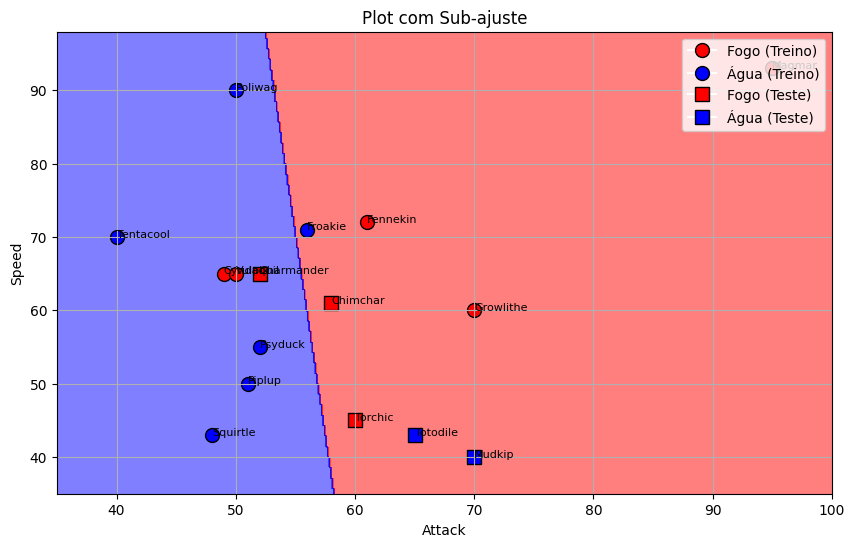

Acurácia do Treino: 0.7272727272727273
Acurácia do Teste: 0.4


In [44]:
model_sub = LogisticRegression(C=0.1)
model_sub.fit(x_train, y_train)
plot_model(
    model_sub,
    x_train,
    y_train,
    x_test,
    y_test,
    f"Plot com Sub-ajuste"
)

### Superajuste (Modelo mais complexo)

Z: [1 1 1 ... 0 0 0]


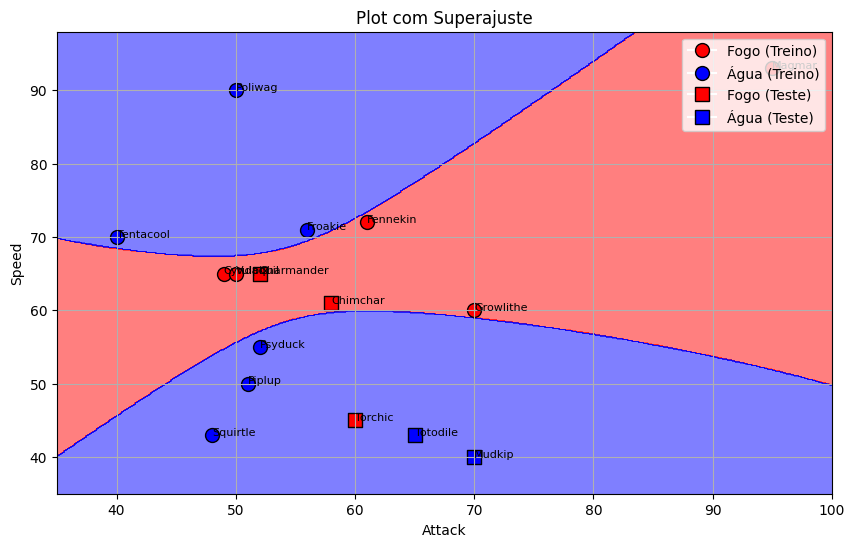

Acurácia do Treino: 1.0
Acurácia do Teste: 0.8


In [55]:
model_super = make_pipeline(PolynomialFeatures(degree=4), LogisticRegression(max_iter=1000))
model_super.fit(x_train, y_train)
plot_model(
    model_super,
    x_train,
    y_train,
    x_test,
    y_test,
    f"Plot com Superajuste"
)